# Generate DataSet

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [5]:
X,Y = make_classification(n_classes=2,n_features=2,n_samples=400,n_clusters_per_class=1,n_informative=2,random_state=3,n_redundant=0)
Y[Y == 0] = -1 #convert the dataset to 1,-1

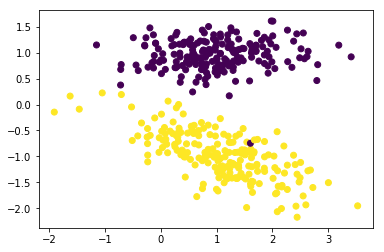

In [7]:
plt.scatter(X[:,0],X[:,1],c=Y)

# Defining SVM

In [10]:
class SVM:
    def __init__(self,C=1.0):
        
        self.C = C
        self.W = 0
        self.b = 0
    
    def hingeloss(self,W,b,X,Y):
        
        loss = 0.0
        loss += 0.5*np.dot(W,W.T)
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size = 100, learning_rate = 0.001,max_itr = 300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        n = learning_rate
        C = self.C
        
        #Init the parameters
        
        W = np.zeros((1,no_of_features))
        bias = 0
        print(self.hingeloss(W,bias,X,Y))
        
        #Training of model
        
        losses = []
        
        for i in range(max_itr):
            
            l = self.hingeloss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                
                gradW = 0
                gradB = 0
                
                for j in range(batch_start,batch_start+batch_size):
                    
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradB += 0
                            gradW += 0
                        else:
                            gradB += C*Y[i]
                            gradW += C*Y[i]*X[i]
                
                
                #Update W,b
                
                W = W - n*W + n*gradW
                bias = bias + n*gradB
                
        self.W = W
        self.b = bias
        return W,bias,losses
            
        

In [12]:
mySVM = SVM()
W,b,losses = mySVM.fit(X,Y)
print(W,b)
print(losses[0],losses[-1])

400.0
[[-0.3463874  -2.09035976]] 0.42300000000000026
400.0 14.521108131513738


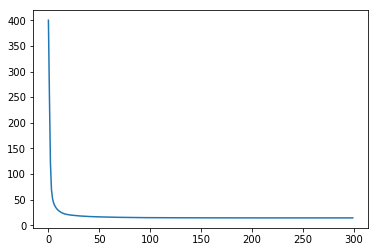

In [14]:
plt.plot(losses)
plt.show()

In [24]:
def plotHyperplane(w1,w2,b):
    X_1 = np.linspace(-2,4,10)
    X_2 = -(w1*X_1+b)/w2
    X_P = -(w1*X_1+b+1)/w2
    X_N = -(w1*X_1+b-1)/w2
    plt.figure(figsize=(12,12))
    plt.plot(X_1,X_2,label="Hyperplane WX+B=0")
    plt.plot(X_1,X_P,label="Hyperplane WX+B=1")
    plt.plot(X_1,X_N,label="Hyperplane WX+B=-1")
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.legend()
    plt.show()
    

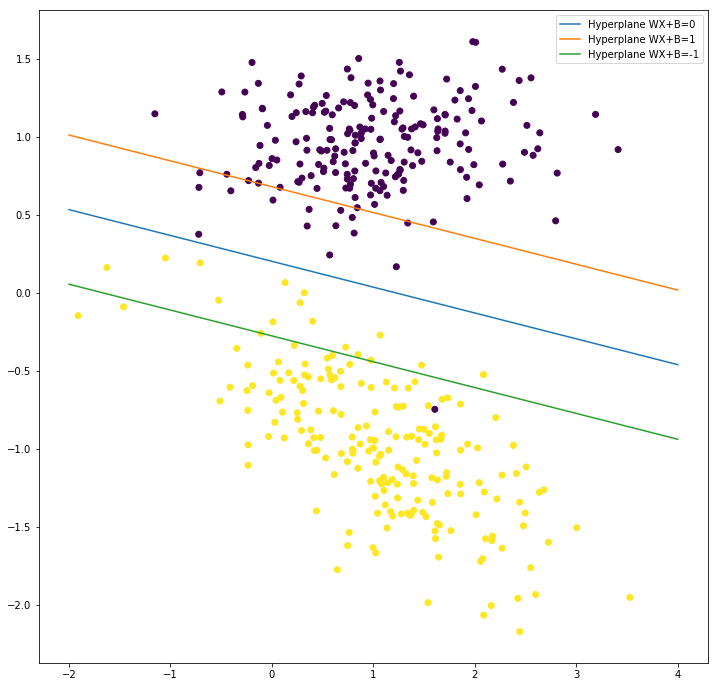

In [25]:
plotHyperplane(W[0,0],W[0,1],b)